<a href="https://colab.research.google.com/github/tmegandoan/assignment3/blob/main/ttd6as_assignment_knn_and_kmc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment 3: $k$ Nearest Neighbor and $k$ Means Clustering

## **Do three questions.**

`! git clone https://www.github.com/DS3001/knn`

In [1]:
! git clone https://www.github.com/DS3001/knn

Cloning into 'knn'...
remote: Enumerating objects: 16, done.
remote: Counting objects: 100% (16/16), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 16 (delta 2), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (16/16), 7.28 MiB | 8.85 MiB/s, done.
Resolving deltas: 100% (2/2), done.


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

**Q1.** This question is a case study for $k$ nearest neighbor. The target variable `y` is `Purchase` and the features of interest are `Age` and `AnnualSalary`.

1. Load the `./data/car_data.csv` data. Look at the head and dimensions of the data.
2. Summarize the variables (`User.ID`, `Gender`, `Age`, `AnnualSalary`, `Purchase`). Are there any missings to clean? Convert the `Gender` categorical variable into a dummy variable that takes the value 0 for male and 1 for female. Create a matrix $X$ of predictors including `Age` and `AnnualSalary`, and an outcome $y$ equaling `Purchase`.
3. MaxMin-normalize `Age` and `AnnualSalary` in `X`.
4. Split the sample into a ~80% training dataset and a ~20% testing dataset.
5. Treat this as a classification problem: The model is supposed to predict 0 or 1 for each customer, classifying them as a purchaser or non-purchaser. Use sklearn to determine the optimal number of neighbors $k$ to use.
6. Run the model for the optimal number of neighbors on the testing data. Cross tabulate the predicted outcomes against the actual outcomes; this is called a **confusion matrix**. How often does the model predict a sale when one fails to occur? How often does the model predict no sale when one does occur? Overall, does it provide accurate predictions?
7. Now, compute confusion matrices separately for men and women, as in part 6. Does the model make more accurate predictions for one sex or the other? Explain. (Performance of algorithms on population subgroups is a growing topic in data science.)

#### 1.1
loading the data

In [3]:
df = pd.read_csv('/content/knn/data/car_data.csv')

In [4]:
df.head()

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0


In [5]:
df.shape

(1000, 5)

#### 1.2

In [6]:
# summarize variables
df.describe()

,User ID,Age,AnnualSalary,Purchased
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,40.106000,72689.000000,0.402000
std,288.819436,10.707073,34488.341867,0.490547
min,1.000000,18.000000,15000.000000,0.000000
25%,250.750000,32.000000,46375.000000,0.000000
50%,500.500000,40.000000,72000.000000,0.000000
75%,750.250000,48.000000,90000.000000,1.000000
max,1000.000000,63.000000,152500.000000,1.000000


In [7]:
# checking the gender variable before converting
df['Gender'].value_counts()

Female    516
Male      484
Name: Gender, dtype: int64

There are no missing values

In [8]:
df['g'] = 0 # gender dummy variable is called 'g'
df.loc[ df['Gender']== 'Female', 'gen_dum'] = 1
df['g'].value_counts()

0    1000
Name: g, dtype: int64

In [9]:
vars = ['Age','AnnualSalary']
X = df.loc[:,vars]
y = df['Purchased']

#### 2.3
maxmin nomralizing age and annual salary in X

In [10]:
def maxmin(x):
  x = (x-min(x))/(max(x) - min(x))
  return x

X = X.apply(maxmin) # apply to age and annual salary

X.describe()

,Age,AnnualSalary
count,1000.000000,1000.000000
mean,0.491244,0.419556
std,0.237935,0.250824
min,0.000000,0.000000
25%,0.311111,0.228182
50%,0.488889,0.414545
75%,0.666667,0.545455
max,1.000000,1.000000


#### 2.4 split the data

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=1)

#### 2.5 classification problem and finding optimal k

In [12]:
from sklearn.neighbors import KNeighborsClassifier # Import the kNN classifier tool
import matplotlib.pyplot as plt

[ 6 16]


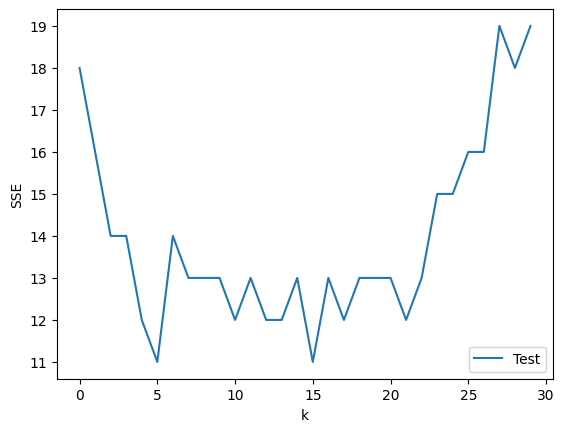

In [13]:
# Determine the optimal k:
k_bar = 30
k_grid = np.arange(1,k_bar) # The range of k's to consider
SSE = np.zeros(k_bar) # Object to save the Sum of Squared Error


for k in range(k_bar):
  model = KNeighborsClassifier(n_neighbors=k+1) # Create a sk model for k
  fitted_model = model.fit(X_train,y_train) # Train the model on our data
  y_hat = fitted_model.predict(X_test) # Predict values for test set
  SSE[k] = np.sum( (y_test-y_hat)**2 ) # Save the computed SSE


SSE_min = np.min(SSE) # Lowest recorded SSE
min_index = np.where(SSE==SSE_min) # Find the indices of y that equal the minimum
k_star = k_grid[min_index] # Find the optimal value of k
print(k_star)

plt.plot(np.arange(0,k_bar),SSE,label='Test') # Plot SSE by k
plt.xlabel("k")
plt.ylabel("SSE")
plt.legend(loc='lower right')

According to our graph, the optimal k is around 5 or 15. As we move forward, we'll talk about better ways to pick and calibrate classifier models, but at this point this is an OK approach

#### 2.6

In [14]:
model = KNeighborsClassifier(n_neighbors=9) # Create a sk model for k
fitted_model = model.fit(X_train,y_train) # Train the model on our data
y_hat = fitted_model.predict(X_test) # Predict values for test set
pd.crosstab(y_test, y_hat)

col_0,0,1
Purchased,,
0,119,6
1,7,68


Based on our cross tabulation, we can see that our model was pretty good at predicting. More than half of the time, the model correctly predicted whether purchased was a 1 or 0. here's 6 times where 0 is classified as a 1 and 7 times where 1 is classified as a zero, but this is 13/200=.07 proportion of cases. The overall accuracy is 186/200=.93 proportion of cases.

#### 2.7

In [15]:
vars = ['Age','AnnualSalary','Gender']
X = df.loc[:,vars]
y = df['Purchased']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=1)
model = KNeighborsClassifier(n_neighbors=9) # Create a sk model for k
fitted_model = model.fit(X_train.drop('Gender',axis=1),y_train) # Train the model o
y_hat = fitted_model.predict(X_test.drop('Gender',axis=1)) # Predict values for tes


In [16]:
y_hat_M = y_hat[ X_test['Gender'] == 'Male']
y_hat_F = y_hat[ X_test['Gender'] == 'Female']
y_M = y_test[ X_test['Gender'] == 'Male']
y_F = y_test[ X_test['Gender'] == 'Female']

In [17]:
pd.crosstab(y_F, y_hat_F)

col_0,0,1
Purchased,,
0,56,6
1,12,35


In [18]:
pd.crosstab(y_M, y_hat_M)

col_0,0,1
Purchased,,
0,58,5
1,10,18


For men, about 76/91 = .83352 are correct, while for women, about 91/109 = .83484. It seems like the model does a better job predicting what a female customer will do, rather than a male customer. The difference in accuracy is pretty minimal, so I would say that the model that was created does a pretty good job at predicting both male and female population groups.

# **Q2.** This question is a case study for $k$ nearest neighbor The target variable `y` is `price` and the features are `year` and `mileage`.

1. Load the `./data/USA_cars_datasets.csv`. Keep the following variables and drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look at the head and dimensions of the data.
2. Maxmin normalize `year` and `mileage`.
3. Split the sample into ~80% for training and ~20% for evaluation.
4. Use the $k$NN algorithm for regression and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the Sum of Squared Error and make a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$?
5. Determine the optimal $k$ for these data.
6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

#### 2.1

In [43]:
## loading the data
cars = pd.read_csv('/content/knn/data/USA_cars_datasets.csv')

In [44]:
## keeping the following variables
list = ['price', 'year', 'mileage']

cars = cars.filter(list)
cars.head()

,price,year,mileage
0,6300,2008,274117
1,2899,2011,190552
2,5350,2018,39590
3,25000,2014,64146
4,27700,2018,6654


In [45]:
## check for NA's
cars.isnull().sum()

price      0
year       0
mileage    0
dtype: int64

there are no NA's to handle

In [46]:
## head and dimensions:
print(cars.shape)

cars.head(5)

(2499, 3)


,price,year,mileage
0,6300,2008,274117
1,2899,2011,190552
2,5350,2018,39590
3,25000,2014,64146
4,27700,2018,6654


#### 2.2

In [47]:
# Maxmin normalization function:
def maxmin(z):
    z = (z-min(z))/(max(z)-min(z))
    return(z)

In [48]:
# Apply maxmin to year and mileage and appending new column
newcars = cars.loc[:,['year','mileage']]
newcars = newcars.apply(maxmin)

newcars['price'] = cars['price']
newcars.head()


,year,mileage,price
0,0.744681,0.269287,6300
1,0.808511,0.187194,2899
2,0.957447,0.038892,5350
3,0.872340,0.063016,25000
4,0.957447,0.006537,27700


#### 2.3 split data

In [49]:
y = newcars['price'] # target variable vector
X = newcars.loc[:,['year','mileage']] # Create feature matrix

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=100)

#### 2.4
Use the  𝑘 NN algorithm for regression and the training data to predict price using year and mileage for the test set for  𝑘=3,10,25,50,100,300 . For each value of  𝑘 , compute the Sum of Squared Error and make a scatterplot showing the test value

In [51]:
# kNN algorithm
from sklearn.neighbors import KNeighborsRegressor as kNNRegression # Import the kNN regression tool

In [52]:
## the y test set data to be used later:

y_test_list = pd.DataFrame(y_test)
y_test_list['index'] = y_test_list.index # making the index its own column to merge data
y_test_list.head(5)

X_test['index'] = X_test.index # making the index its own column to match

test_data = X_test.merge(y_test_list, how = 'inner', on = 'index')
test_data = test_data.drop('index', axis=1) # removing the index column
test_data.head()

X_test = X_test.drop('index', axis=1) # removing the index column

In [55]:
def statics(k,data=newcars): # This function replicates our previous work, with k as an input

    # using the previous variables: X_train, X_test, y_train, y_test

    model = kNNRegression(n_neighbors=k)
    fitted_model = model.fit(X_train,y_train) # Train the model on our data

    y_hat = fitted_model.predict(X_test) # Fit the model to the points
    test_data['Predicted_Price'] = y_hat

    # SSE
    SSE = np.sum( (y_test-y_hat)**2 ) # Save the computed SSE
    print('The Sum of Squared Error=', SSE)

    this_plot = sns.scatterplot(data=test_data,x='year',y='mileage',hue='Predicted_Price') # Create seaborn plot

    sns.move_legend(this_plot, "upper left", bbox_to_anchor=(1, 1)) # Move legend off the plot canvas


The Sum of Squared Error= 63223286609.11111


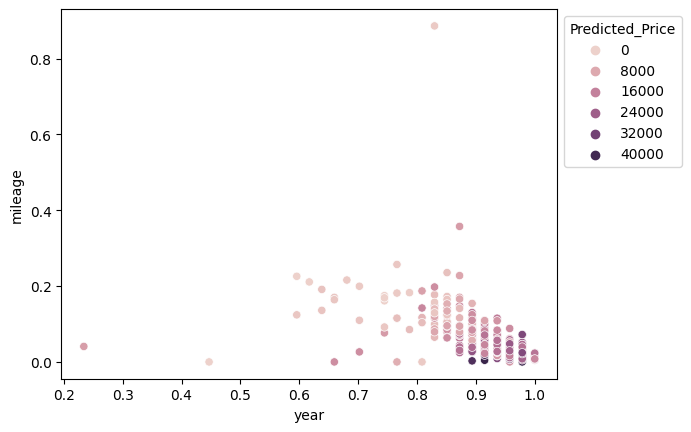

In [56]:
statics(k=3)

The Sum of Squared Error= 55401092793.409996


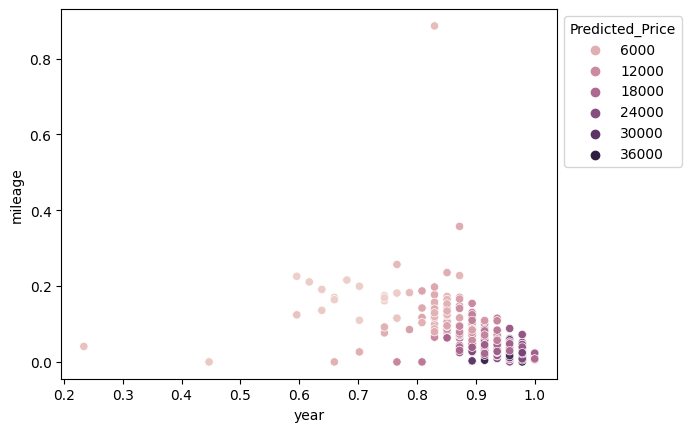

In [ ]:
statics(k=10)

The Sum of Squared Error= 51585228924.304


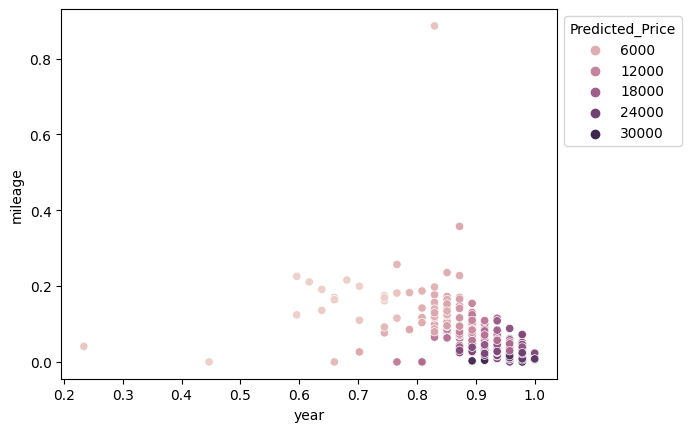

In [ ]:
statics(25)

The Sum of Squared Error= 49847721982.09799


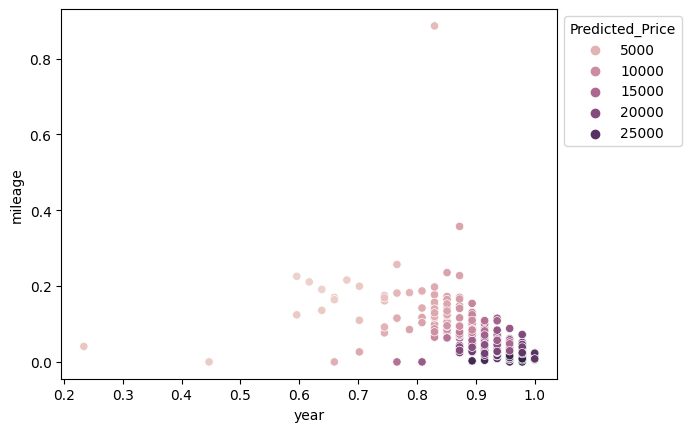

In [ ]:
statics(50)

The Sum of Squared Error= 49135529480.4603


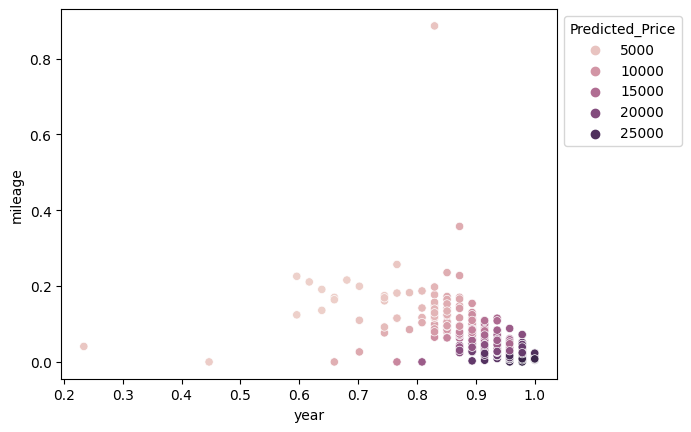

In [ ]:
statics(100)

The Sum of Squared Error= 50238649457.106


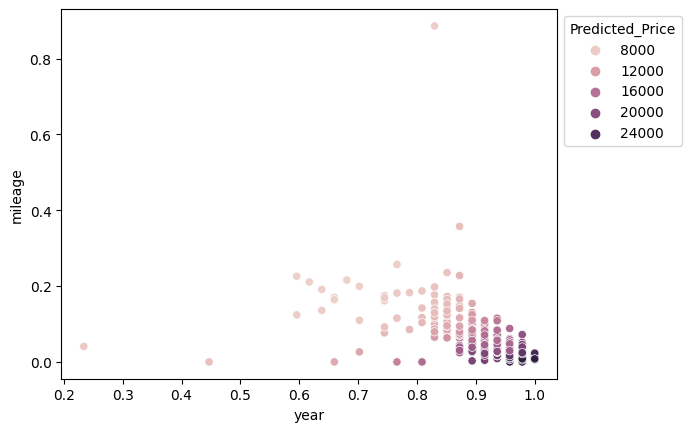

In [ ]:
statics(300)

as k increases, the grouping seems a bit more distinct

### 2.5 The optimal K

[44]


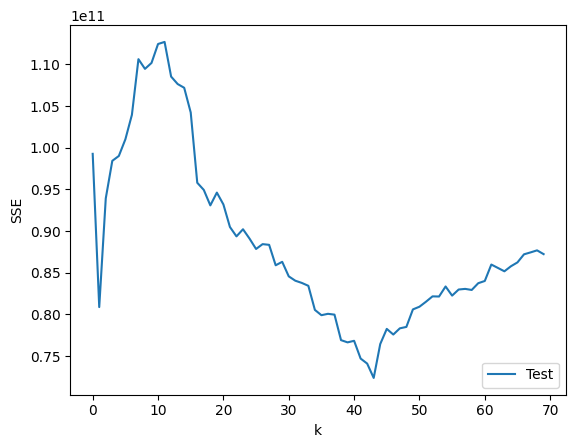

In [ ]:
# Determine the optimal k:
k_bar = 70
k_grid = np.arange(1,k_bar) # The range of k's to consider
SSE = np.zeros(k_bar) # Object to save the Sum of Squared Error


for k in range(k_bar):
  model = KNeighborsClassifier(n_neighbors=k+1) # Create a sk model for k
  fitted_model = model.fit(X_train,y_train) # Train the model on our data
  y_hat = fitted_model.predict(X_test) # Predict values for test set
  SSE[k] = np.sum( (y_test-y_hat)**2 ) # Save the computed SSE


SSE_min = np.min(SSE) # Lowest recorded SSE
min_index = np.where(SSE==SSE_min) # Find the indices of y that equal the minimum
k_star = k_grid[min_index] # Find the optimal value of k
print(k_star)

plt.plot(np.arange(0,k_bar),SSE,label='Test') # Plot SSE by k
plt.xlabel("k")
plt.ylabel("SSE")
plt.legend(loc='lower right')

The optimal K value is 44

#### 2.6
Describe what happened in the plots of predicted versus actual prices as  𝑘  varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

If k is too small, the model will underfit and not be as accurate. If k is too big, the model will overfit and will also not be as accurate. Overfitting means our model is too well adapted to our training set to the point where it does not do good with predicting on new data. Through our process in step 6, we see that the optimal k value which will produce the lowest SSE is 44.

**Q3.** This question is a case study for $k$ nearest neighbor, particularly variable selection. The data for the question include (summaries reproduced here directly from the codebook):

- age: age of the patient (years)
- anaemia: decrease of red blood cells or hemoglobin (boolean)
- high blood pressure: if the patient has hypertension (boolean)
- creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L)
- diabetes: if the patient has diabetes (boolean)
- ejection fraction: percentage of blood leaving the heart at each contraction (percentage)
- platelets: platelets in the blood (kiloplatelets/mL)
- sex: woman or man (binary)
- serum creatinine: level of serum creatinine in the blood (mg/dL)
- serum sodium: level of serum sodium in the blood (mEq/L)
- smoking: if the patient smokes or not (boolean)
- time: follow-up period (days)
- death event: if the patient deceased during the follow-up period (boolean)

1. Load the `./data/heart_failure_clinical_records_dataset.csv`. Are there any `NA`'s to handle? use `.drop()` to remove `time` from the dataframe.
2. Make a correlation matrix. What variables are strongly associated with a death event?
3. For the dummy variables `anaemia`, `diabetes`, `high_blood_pressure`, `sex`, and `smoking`, compute a summary table of `DEATH_EVENT` grouped by the variable. For which variables does a higher proportion of the population die when the variable takes the value 1 rather than 0?
4. On the basis of your answers from 2 and 3, build a matrix $X$ of the variables you think are most predictive of a death, and a variable $y$ equal to `DEATH_EVENT`.
5. Maxmin normalize all of the variables in `X`.
6. Split the sample into ~80% for training and ~20% for evaluation. (Try to use the same train/test split for the whole question, so that you're comparing apples to apples in the questions below.).
7. Determine the optimal number of neighbors for a $k$NN regression for the variables you selected.
8. OK, do steps 5 through 7 again, but use all of the variables (except `time`). Which model has a lower Sum of Squared Error? Which would you prefer to use in practice, if you had to predict `DEATH_EVENT`s? If you play with the selection of variables, how much does the SSE change for your fitted model on the test data? Are more variables better, in this case? Explain your findings.

**Q4.** Let's do some very basic computer vision. We're going to import the MNIST handwritten digits data and $k$NN to predict values (i.e. "see/read").

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5):
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?
3. Use Numpy's `.reshape()` method to covert the training and testing data from a matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).
4. Use the reshaped `X_test` and `y_test` data to create a $k$-nearest neighbor classifier of digit. What is the optimal number of neighbors $k$? If you can't determine this, play around with different values of $k$ for your classifier.
5. For the optimal number of neighbors, how well does your predictor perform on the test set?
6. So, this is how computers "see." They convert an image into a matrix of values, that matrix becomes a vector in a dataset, and then we deploy ML tools on it as if it was any other kind of tabular data. To make sure you follow this, invent a way to represent a color photo in matrix form, and then describe how you could convert it into tabular data. (Hint: RGB color codes provide a method of encoding a numeric value that represents a color.)

**Q5.** This question is a case study for $k$ means clustering.

1. Load the `airbnb_hw.csv` data. Clean `Price` along with `Beds`, `Number of Reviews`, and `Review Scores Rating`.
2. Maxmin normalize the data and remove any `nan`'s (`KMeans` from `sklearn` doesn't accept `nan` input).
3. Use `sklearn`'s `KMeans` module to cluster the data by `Beds`, `Number of Reviews`, and `Review Scores Rating` for `k=6`.
4. Use `seaborn`'s `.pairplot()` to make a grid of scatterplots that show how the clustering is carried out in multiple dimensions.
5. Use `.groupby` and `.describe` to compute the average price for each cluster. Which clusters have the highest rental prices?
6. Use a scree plot to pick the number of clusters and repeat steps 4 and 5.

**Q6.** This is a question about $k$ means clustering. We want to investigate how adjusting the "noisiness" of the data impacts the quality of the algorithm and the difficulty of picking $k$.

1. Run the code below, which creates four datasets: `df0_125`, `df0_25`, `df0_5`, `df1_0`, and `df2_0`. Each data set is created by increasing the amount of `noise` (standard deviation) around the cluster centers, from `0.125` to `0.25` to `0.5` to `1.0` to `2.0`.

```
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,1,N),np.random.normal(1,1,N)])
    X2 = np.array([np.random.normal(3,1,N),np.random.normal(2,1,N)])
    X3 = np.array([np.random.normal(5,1,N),np.random.normal(3,1,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)
```

2. Make scatterplots of the $(X1,X2)$ points by group for each of the datasets. As the `noise` goes up from 0.125 to 2.0, what happens to the visual distinctness of the clusters?
3. Create a scree plot for each of the datasets. Describe how the level of `noise` affects the scree plot (particularly the presence of a clear "elbow") and your ability to definitively select a $k$.
4. Explain the intuition of the elbow, using this numerical simulation as an example.

In [19]:
from sklearn.cluster import KMeans # Import kmc
import matplotlib.pyplot as plt

#### 6.1
run the code

In [30]:
import numpy as np
import pandas as pd

def createData(noise,N=50):
  np.random.seed(100) # Set the seed for replicability
  # Generate (x1,x2,g) triples:
  X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
  X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
  X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
  # Concatenate into one data frame
  gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
  gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
  gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
  df = pd.concat([gdf1,gdf2,gdf3],axis=0)
  return df


df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)

#### 6.2
Make scatterplots of the  (𝑋1,𝑋2)  points by group for each of the datasets. As the noise goes up from 0.125 to 2.0, what happens to the visual distinctness of the clusters?

<Axes: xlabel='x1', ylabel='x2'>

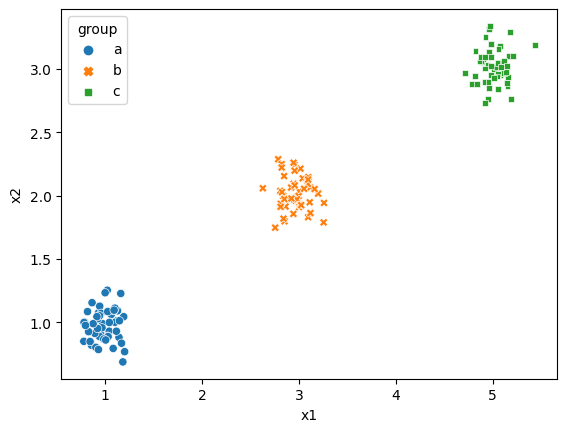

In [31]:
sns.scatterplot(data = df0_125, x = 'x1',y='x2',hue='group',style='group')

<Axes: xlabel='x1', ylabel='x2'>

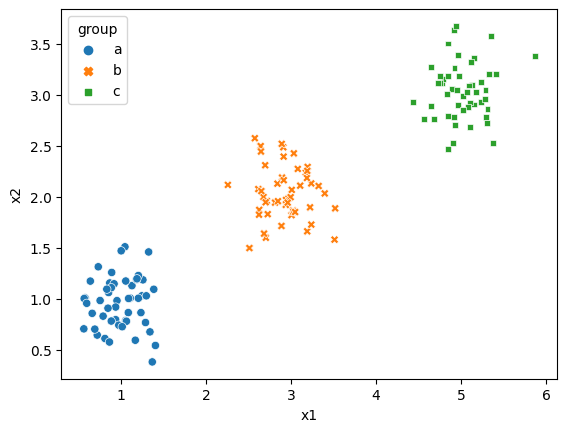

In [32]:
sns.scatterplot(data = df0_25, x = 'x1',y='x2',hue='group',style='group')

<Axes: xlabel='x1', ylabel='x2'>

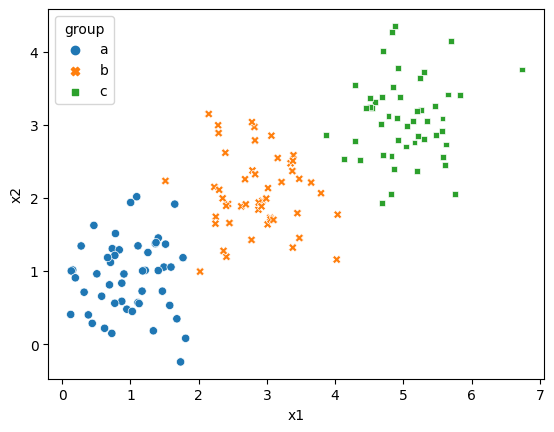

In [33]:
sns.scatterplot(data = df0_5, x = 'x1',y='x2',hue='group',style='group')

<Axes: xlabel='x1', ylabel='x2'>

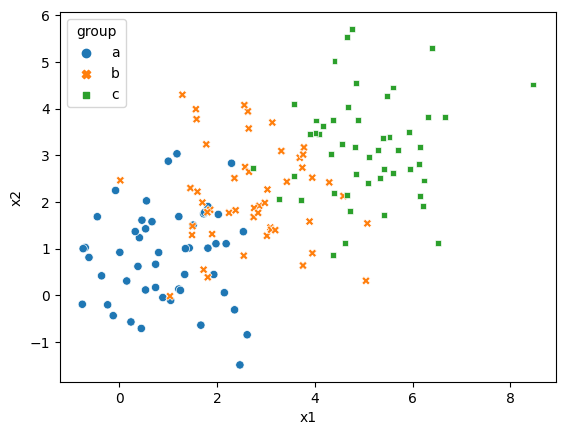

In [34]:
sns.scatterplot(data = df1_0, x = 'x1',y='x2',hue='group',style='group')

<Axes: xlabel='x1', ylabel='x2'>

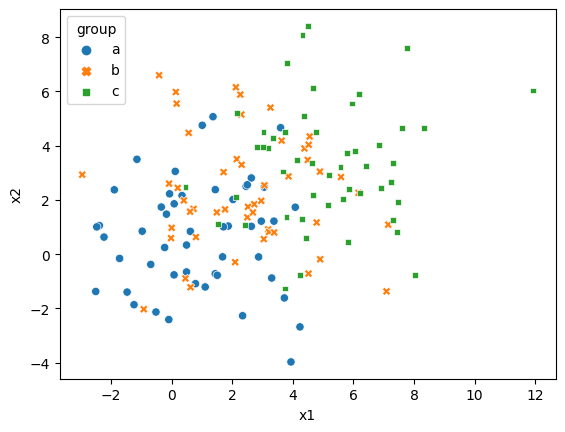

In [35]:
sns.scatterplot(data = df2_0, x = 'x1',y='x2',hue='group',style='group')

When we increase the noise, the points across all groups start to get closer together and start to overlap more. The clearer clustering of the groups begins to get more hazy.

#### 6.3


In [36]:
def maxmin(x): # Max-min scaler function
  x = (x-min(x))/(max(x)-min(x))
  return x

In [37]:
def scree(data): # function to make scree plots quickly

  X = data.loc[ : , ['x1','x2'] ] # Select data to cluster
  X = X.apply(maxmin) # Normalize the data
  # Create a scree plot:
  k_bar = 15
  k_grid = np.arange(1,k_bar+1) # The range of k's to consider
  SSE = np.zeros(k_bar) # We'll store the training error here
  for k in range(k_bar): # For indices from 0 to k_bar-1
    model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0) #
    model = model.fit(X) # Fit the emodel
    SSE[k] = model.inertia_ # Record the sum of squared error for k in the SSE
  scree_plot, axes = plt.subplots()
  sns.lineplot(x=k_grid, y=SSE).set_title('Scree Plot') # Create scree plot
  axes.set_ylim(0, 35)

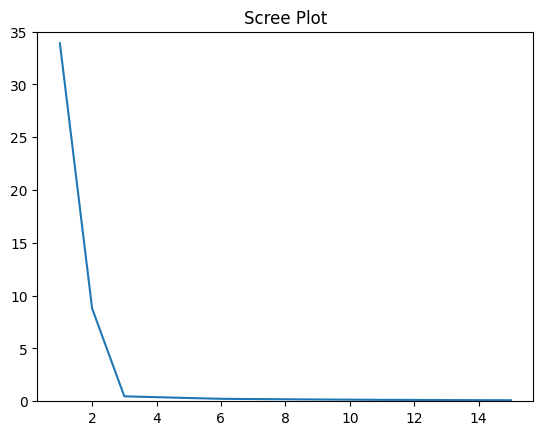

In [38]:
scree( data = df0_125 )

elbow at around k = 3

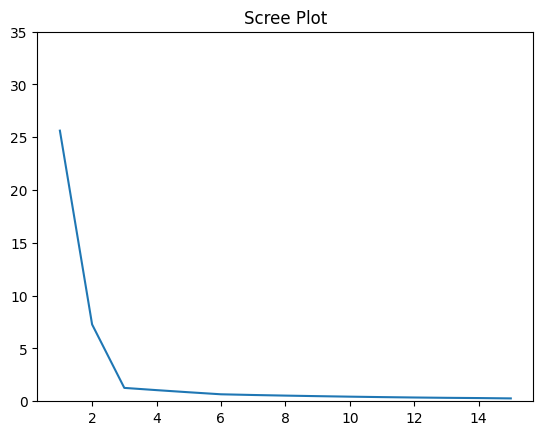

In [39]:
scree( data = df0_25 )

elbow at k = 3

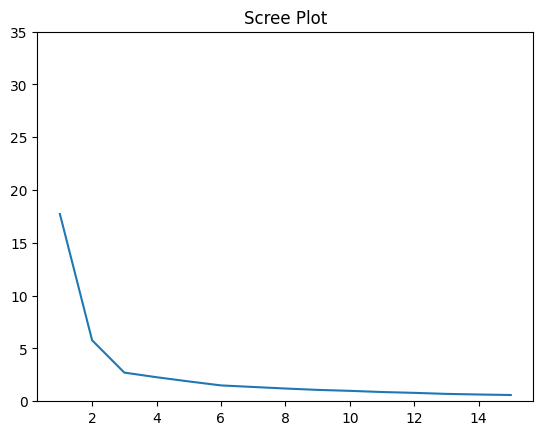

In [40]:
scree( data = df0_5 )

elbow at k = 3

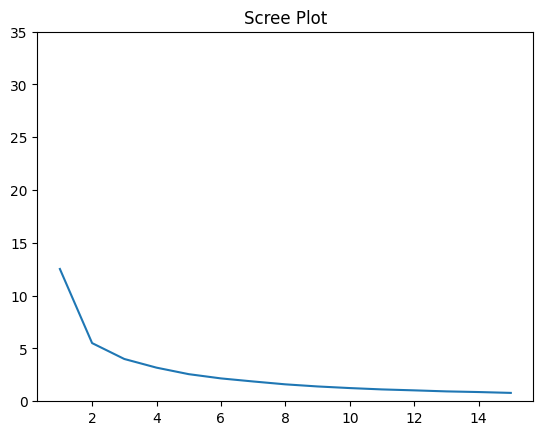

In [41]:
scree( data = df1_0)

potential elbow at k = 2

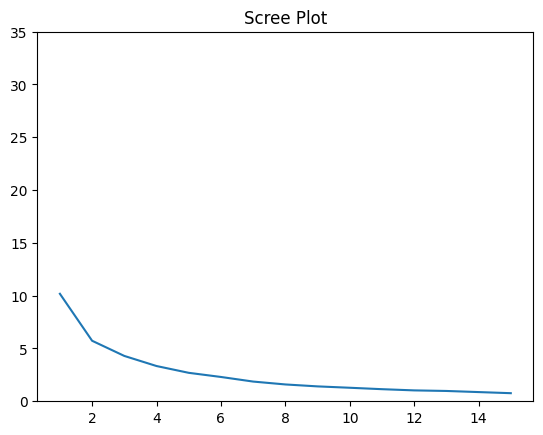

In [42]:
scree( df2_0 )

less obvious elbow here

#### 2.4
Explain the intuition of the elbow, using this numerical simulation as an example.

 As the noise goes up, the
groups spread out, and eventually they are visually indistinct. Even though we
know that points to the upper right are probably from cluster c and points to
the bottom left are probably from cluster a, the significant overlap among
groups means it's no longer clear how many groups to pick or which points
belong to each. In this case, the clustering may or may not be stable, and isn't
really uncovering hidden heterogeneity. So, if there are clusters that are
separated and visually distinct, the scree plot approach will work and there will
be a distinct elbow; if it's just a cloud of points, the scree plot will be smooth,
and the elbow will be indistinct.


**Q7.** We looked at computer vision with $k$NN in a previous question. Can $k$ means clustering correctly group digits, even if we don't know which symbols are which?

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5):
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?
3. Use Numpy's `.reshape()` method to covert the training and testing data from a matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).
4. Use $k$ means clustering on the reshaped `X_test` data with `k=10`.  
5. Cross tabulate the cluster assignments with the true labels for the test set values. How good is the correspondence? What proportion of digits are clustered correctly? Which digits are the hardest to distinguish from one another? Can $k$MC recover the latent digits 0 to 9, without even knowing what those digits were?
6. If you use a scree plot to determine the number of clusters $k$, does it pick 10 (the true number of digits), or not? If it fails to pick $k=10$, which digits does it tend to combine into the same classification?